In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings

sns.set(style="darkgrid")
sns.set_theme(style="ticks", color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
lefs = pd.read_csv("Stem_Cell_Patients.csv", parse_dates=["Date of Procedure"])
lefs.dropna(subset=["Age","Pre-Op LEFS"], axis=0, inplace=True)
lefs.drop(columns=["Date of Procedure","Patient ID#","Misc."], inplace=True)
lefs["Gender"].replace(to_replace=["Male ","Female "], value=["Male","Female"], inplace=True)
for c in ["Age","Left","Right","IV"]:
    lefs[c] = lefs[c].astype("int")
lefs.loc[(lefs.Left == 1) & ((lefs.Right == 0)), "side_of_body"] = "Left"
lefs.loc[(lefs.Right == 1) & ((lefs.Left == 0)), "side_of_body"] = "Right"
lefs["side_of_body"].fillna("Both", inplace=True)

display(lefs.head())
print("Count NA records")
display(lefs.isna().sum())

Gender  Age   BMI Provider  Left  Right  IV  Pre-Op LEFS location  \
0    Male   59  37.5       KP     1      0   0         77.0      hip   
1    Male   58  21.5       MP     0      1   0         16.0      hip   
2  Female   58  31.9       KP     1      1   0         59.0      hip   
3    Male   63  29.5       KP     0      1   0         66.0      hip   
4    Male   55  27.1       KP     0      1   0         61.0      hip   

  side_of_body  
0         Left  
1        Right  
2         Both  
3        Right  
4        Right

Count NA records


Gender           0
Age              0
BMI             12
Provider         0
Left             0
Right            0
IV               0
Pre-Op LEFS      0
location         0
side_of_body     0
dtype: int64

## Scatter plots

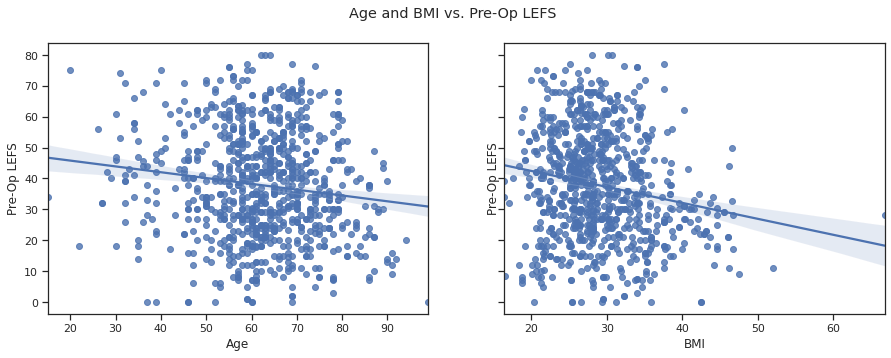

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))

fig.suptitle("Age and BMI vs. Pre-Op LEFS")

# Age
sns.regplot(x="Age", y="Pre-Op LEFS", data=lefs, ax=axes[0])

# BMI
sns.regplot(x="BMI", y="Pre-Op LEFS", data=lefs, ax=axes[1])

plt.show()

<IPython.core.display.Javascript object>


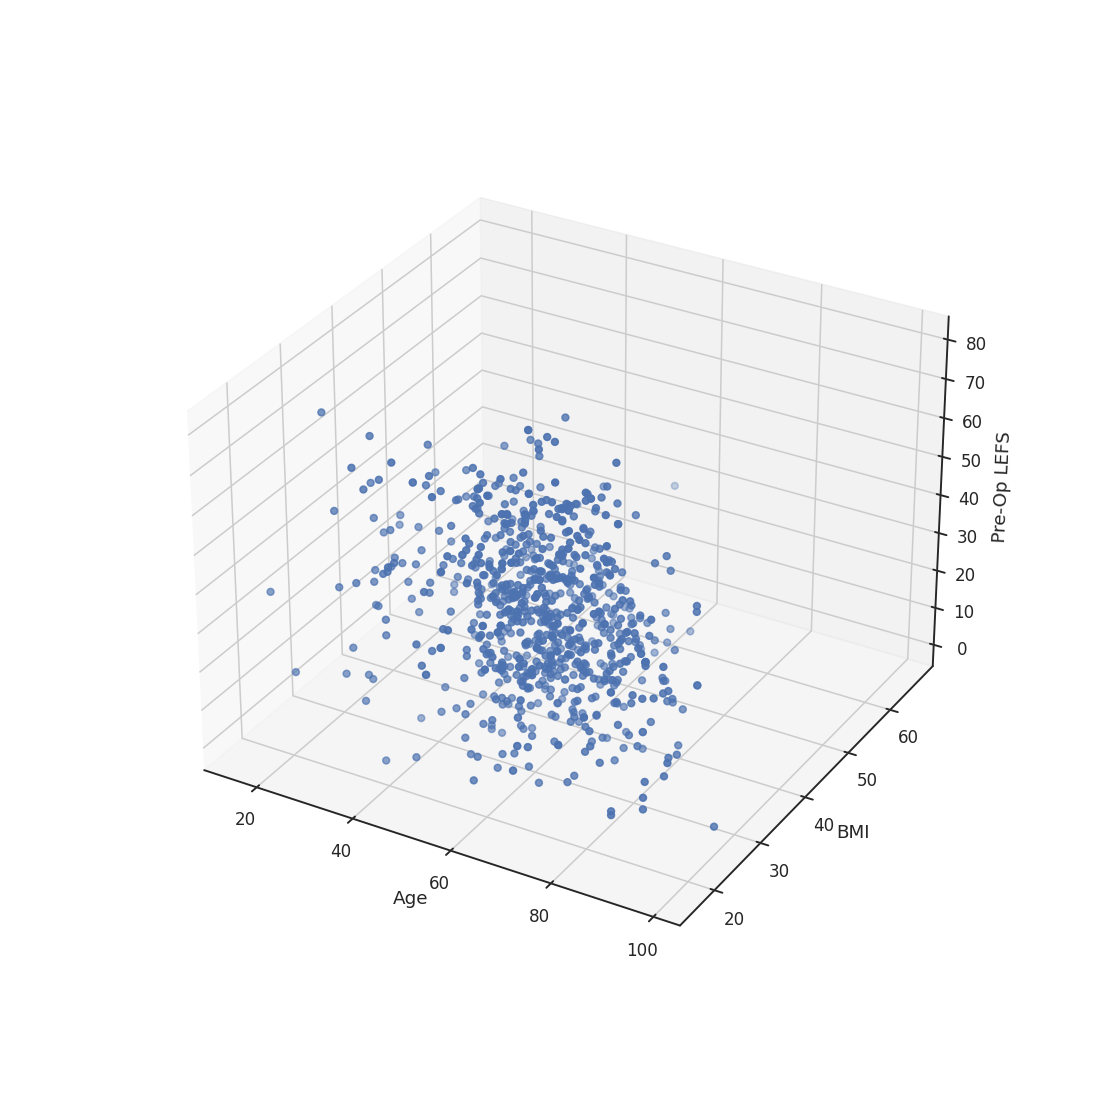

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = lefs['Age']
y = lefs['BMI']
z = lefs['Pre-Op LEFS']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Pre-Op LEFS")

ax.scatter(x,y,z)
ax.set_title("")

plt.show()

## Distribution plots

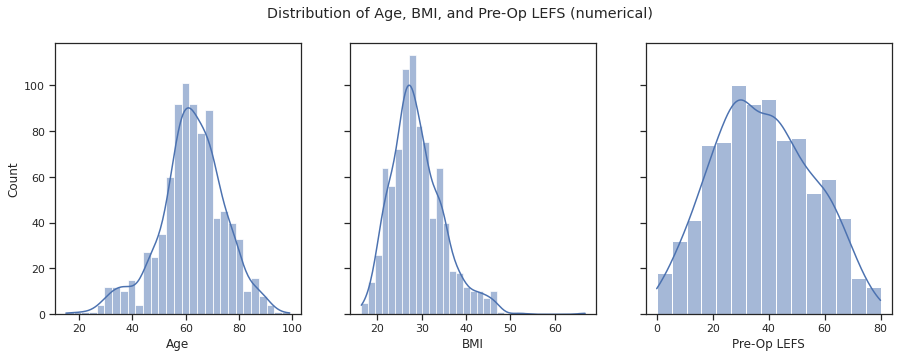

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))
fig.suptitle("Distribution of Age, BMI, and Pre-Op LEFS (numerical)")

# Age
sns.histplot(x="Age", data=lefs, kde=True, ax=axes[0])

# BMI
sns.histplot(x="BMI", data=lefs, kde=True, ax=axes[1])

# Pre-Op LEFS
sns.histplot(x="Pre-Op LEFS", data=lefs, kde=True, ax=axes[2])

plt.show()

## Distribution of categorical variables

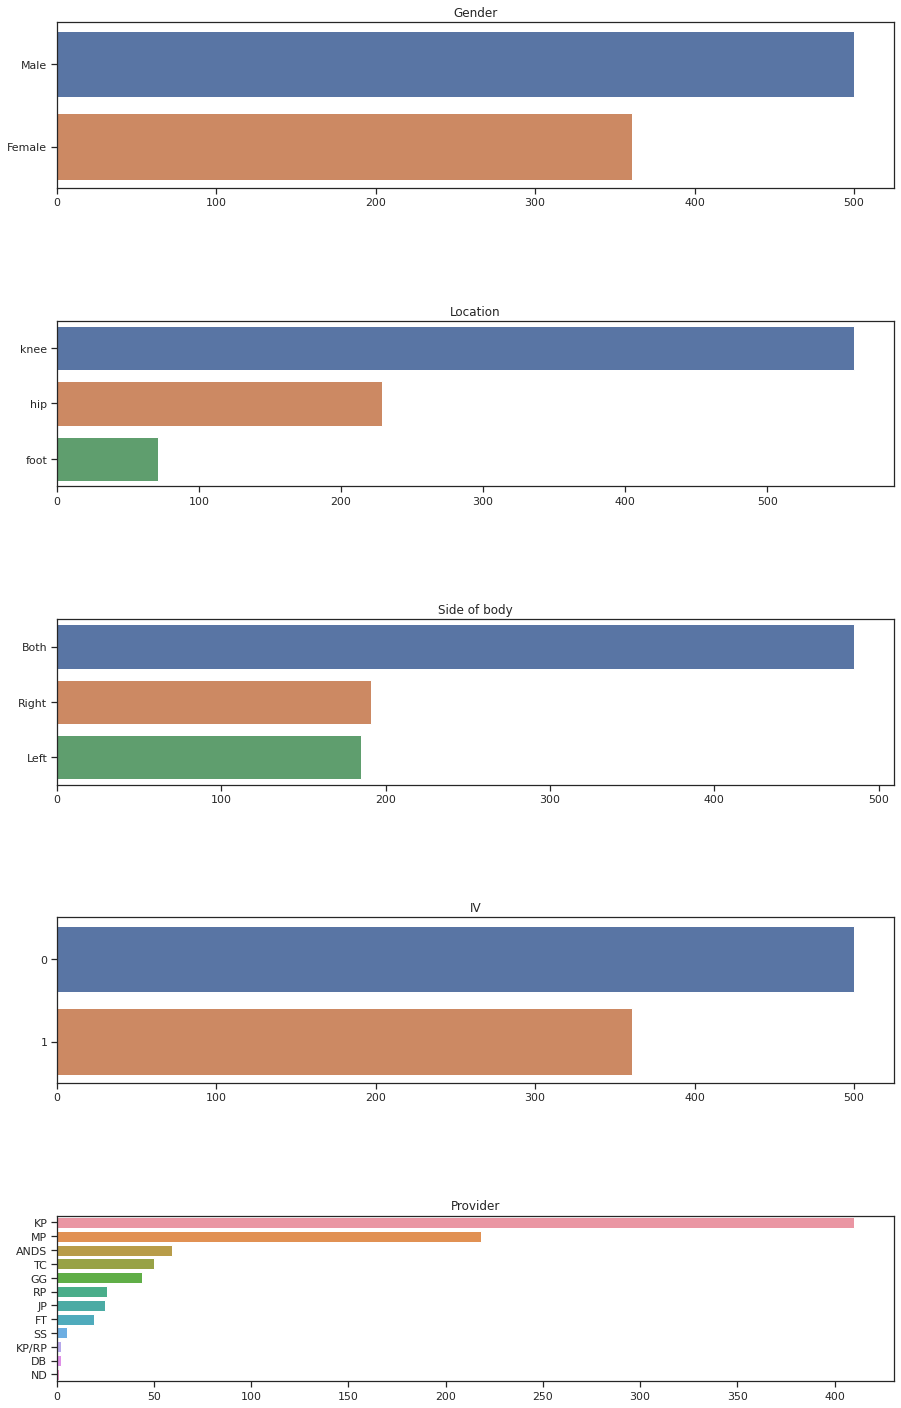

In [5]:
gender_count = pd.DataFrame(lefs["Gender"].value_counts())
location_count = pd.DataFrame(lefs["location"].value_counts())
sob_count = pd.DataFrame(lefs["side_of_body"].value_counts())
iv_count = pd.DataFrame(lefs["IV"].value_counts())
provider_count = pd.DataFrame(lefs["Provider"].value_counts())

for df in [gender_count,location_count,sob_count,iv_count,provider_count]:
    df.index = df.index.astype("str")

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,25))
plt.subplots_adjust(hspace = 0.8)

# Gender
sns.barplot(y=gender_count.index.tolist(), x=gender_count.values.reshape(-1), ax=axes[0])
axes[0].set_title("Gender")

# Location
sns.barplot(y=location_count.index.tolist(), x=location_count.values.reshape(-1), ax=axes[1])
axes[1].set_title("Location")

# Side of body
sns.barplot(y=sob_count.index.tolist(), x=sob_count.values.reshape(-1), ax=axes[2])
axes[2].set_title("Side of body")

# IV
sns.barplot(y=iv_count.index.tolist(), x=gender_count.values.reshape(-1), ax=axes[3])
axes[3].set_title("IV")

# Provider
sns.barplot(y=provider_count.index.tolist(), x=provider_count.values.reshape(-1), ax=axes[4])
axes[4].set_title("Provider")

plt.show()

## Distribution of categorical variables vs. Pre-Op LEFS

<Figure size 1080x360 with 0 Axes>

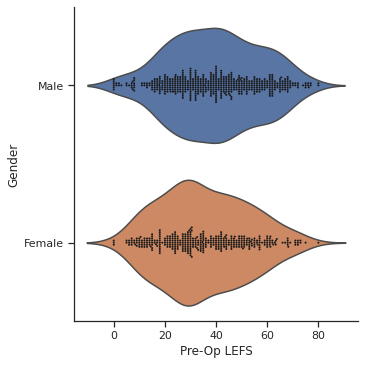

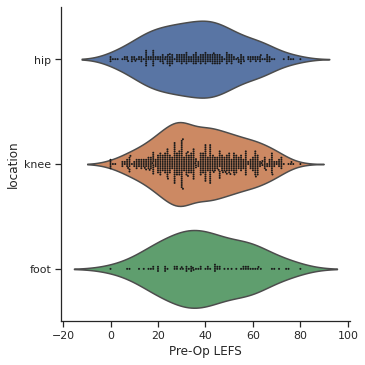

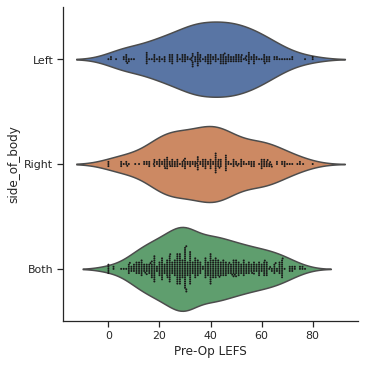

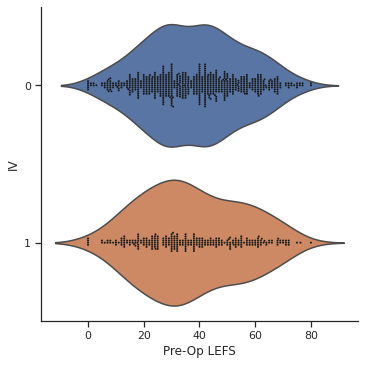

In [6]:
df = lefs.copy()
df["IV"] = df["IV"].astype("str")
df.drop(columns=["Left","Right"], inplace=True)

plt.figure(figsize=(15,5))

# Gender
sns.catplot(x="Pre-Op LEFS", y="Gender", kind="violin", inner=None, data=lefs)
sns.swarmplot(x="Pre-Op LEFS", y="Gender", color="k", size=2, data=lefs)

# Location
sns.catplot(x="Pre-Op LEFS", y="location", kind="violin", inner=None, data=lefs)
sns.swarmplot(x="Pre-Op LEFS", y="location", color="k", size=2, data=lefs)

# Side of body
sns.catplot(x="Pre-Op LEFS", y="side_of_body", kind="violin", inner=None, data=lefs)
sns.swarmplot(x="Pre-Op LEFS", y="side_of_body", color="k", size=2, data=lefs)

# IV
sns.catplot(x="Pre-Op LEFS", y="IV", kind="violin", inner=None, data=df)
sns.swarmplot(x="Pre-Op LEFS", y="IV", color="k", size=2, data=df)

plt.show()

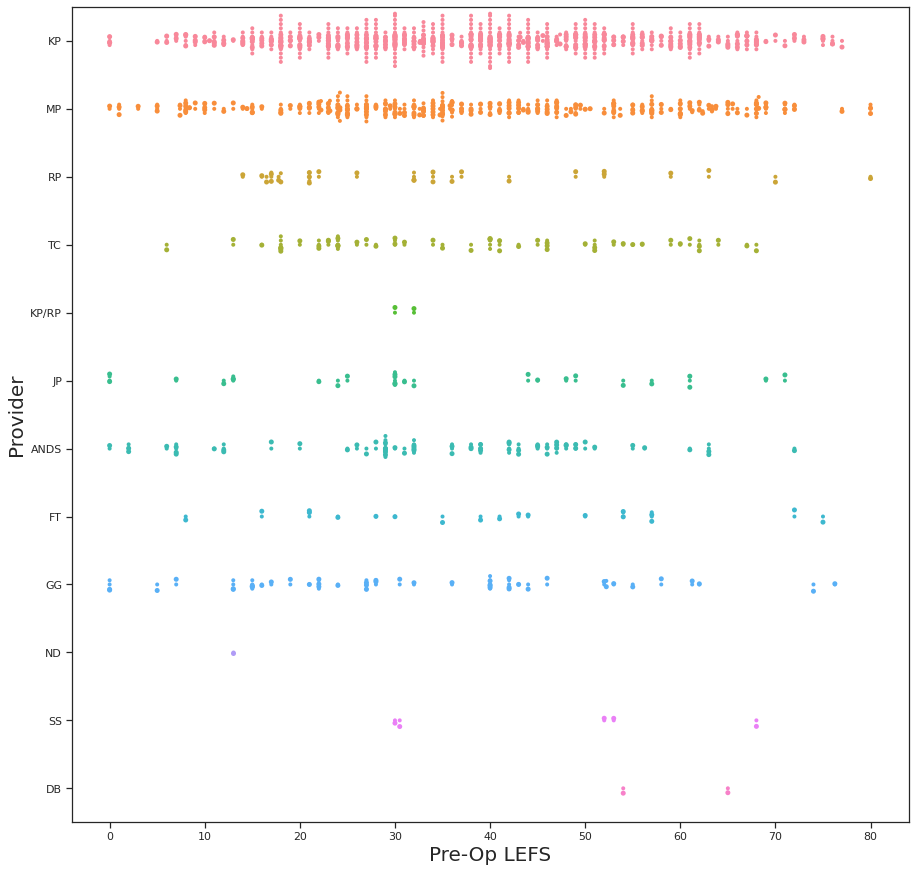

In [7]:
plt.figure(figsize=(15,15))

# Provider
sns.stripplot(x="Pre-Op LEFS", y="Provider", data=lefs)
sns.swarmplot(x="Pre-Op LEFS", y="Provider", size=4, data=lefs)

plt.xlabel("Pre-Op LEFS", size=20)
plt.ylabel("Provider", size=20)

plt.show()

## Summary statistics

In [8]:
display(df.describe())
display(df[["Gender","location","side_of_body","IV","Provider"]].describe())

Age         BMI  Pre-Op LEFS
count  861.000000  849.000000   861.000000
mean    62.207898   29.052367    37.817631
std     12.378986    5.985959    17.626818
min     15.000000   16.400000     0.000000
25%     56.000000   25.100000    25.000000
50%     63.000000   28.100000    37.000000
75%     70.000000   32.400000    51.000000
max     99.000000   66.800000    80.000000

Gender location side_of_body   IV Provider
count     861      861          861  861      861
unique      2        3            3    2       12
top      Male     knee         Both    0       KP
freq      500      561          485  595      410